In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
%matplotlib notebook

In [24]:
def poisson_generator(m, start_time, stop_time):
    # gti - good time intervals  [[t0, t1], [t0, t1],.......]
    
    # m - среднее число фотонов в секунду
    # start_time - начало наблюдения 
    # stop_time - конец наблюдения
    arrival_times = []
    t = start_time - (1/m)*np.log(1-np.random.random())
    while t < stop_time:
        arrival_times.append(t)
        t -= (1/m)*np.log(1-np.random.random())
    
        
    return np.array(arrival_times)

In [25]:
times = poisson_generator(0.5, 0, 139)

<IPython.core.display.Javascript object>


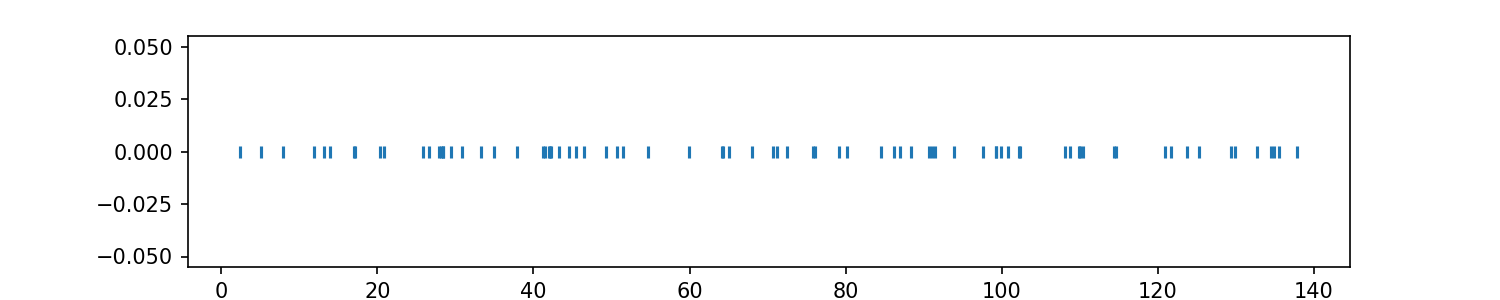

In [26]:
plt.figure(figsize=(10,2))
plt.scatter(times, np.zeros(len(times)), marker='|')

In [30]:
times = poisson_generator(0.5, 0, 139)
print(len(times))
print(times)

60
[  1.69897191   4.6151114    5.75552725   7.51933657   7.5428455
   8.27010702   9.87711566  12.20774618  13.74919977  14.44063132
  16.36184923  16.87062215  21.0521055   22.41245302  22.96223154
  25.77256615  30.50751484  32.06162763  33.3756406   35.65036909
  38.01725204  39.41208304  41.73427914  42.62102083  46.55038461
  47.26288448  48.85509078  52.34567869  58.17235002  58.53503579
  59.33635739  62.16713987  63.1903544   63.64806123  65.03775391
  65.65865822  66.47450371  67.79257896  68.90325794  74.12648696
  74.45191041  76.76796337  77.17462984  78.49405057  84.86818991
  86.79879762  87.38977866  94.4984941  101.87904116 101.90188999
 105.52587094 106.75694763 109.47289293 111.11428593 111.26495921
 125.6252778  129.67973792 135.11252644 138.10134147 138.26359792]


In [36]:
dtimes = times[1:]-times[:-1]

In [37]:
1/np.mean(dtimes)

0.43202988742058834

In [40]:
E = np.zeros(1000)
D = np.zeros(1000)
start = 0 
stop = 500
m = 0.7

for i in range(1000):
    times = poisson_generator(m, start, stop)
    dtimes = times[1:]-times[:-1]
    E[i] = np.mean(dtimes)
    D[i] = np.var(dtimes)

<IPython.core.display.Javascript object>


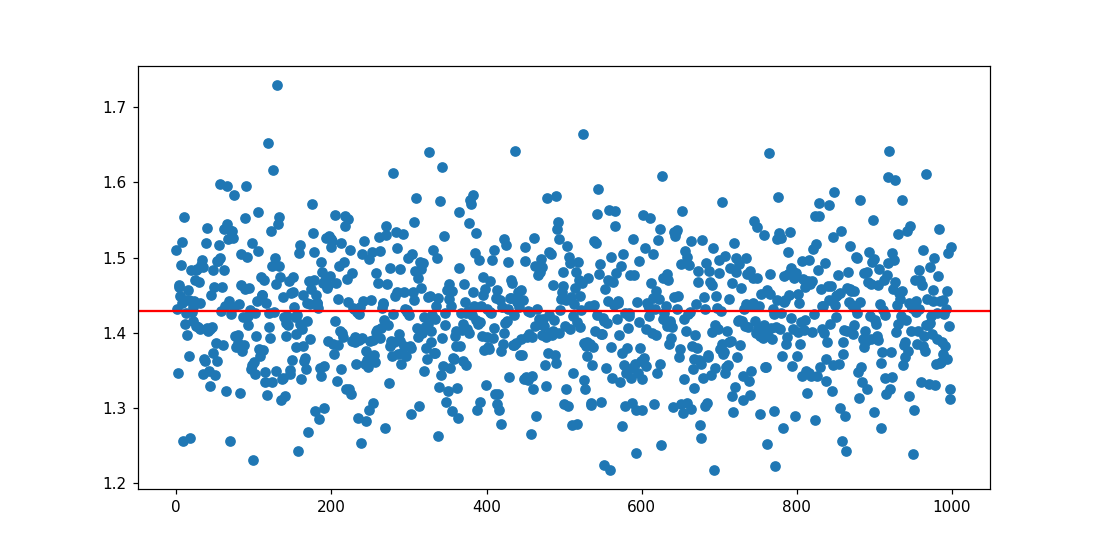

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(np.arange(1000), E)
plt.axhline(1/m, color='red')


<IPython.core.display.Javascript object>


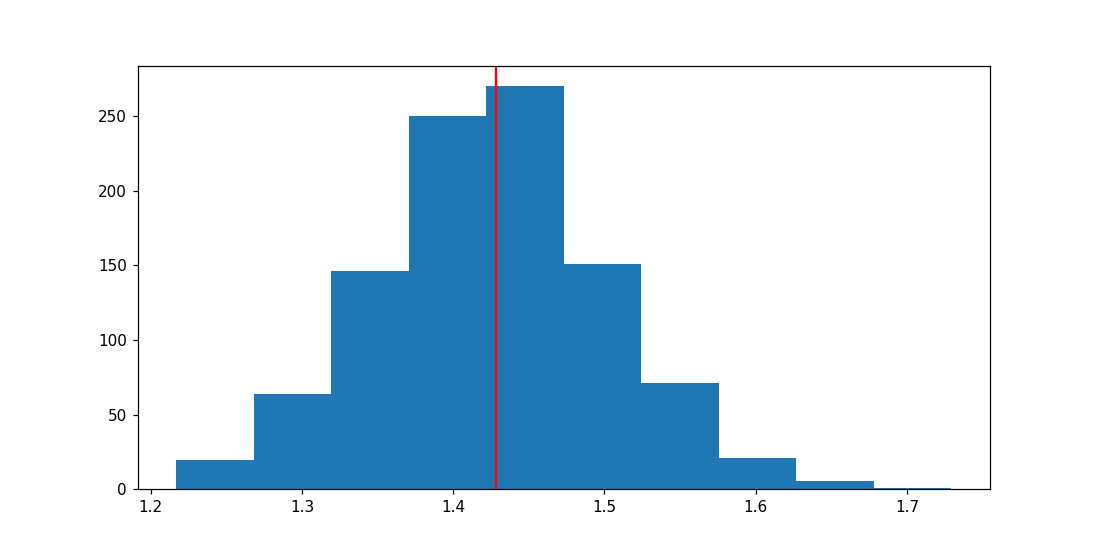

In [44]:
plt.figure(figsize=(10,5))
plt.hist(E)
plt.axvline(1/m, color='red')


<IPython.core.display.Javascript object>


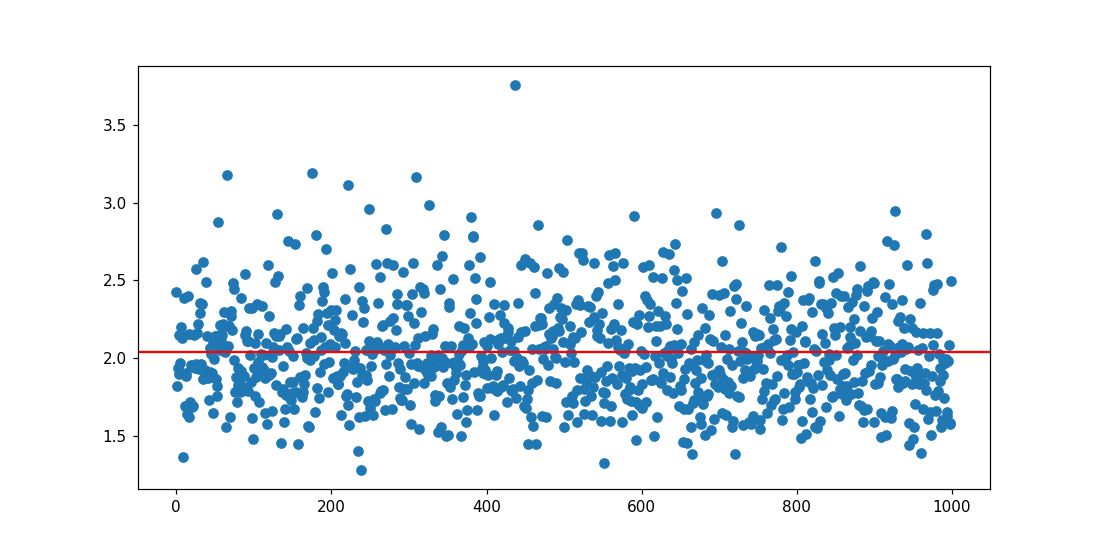

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(np.arange(1000), D)
plt.axhline(1/(m**2), color='red')


<IPython.core.display.Javascript object>


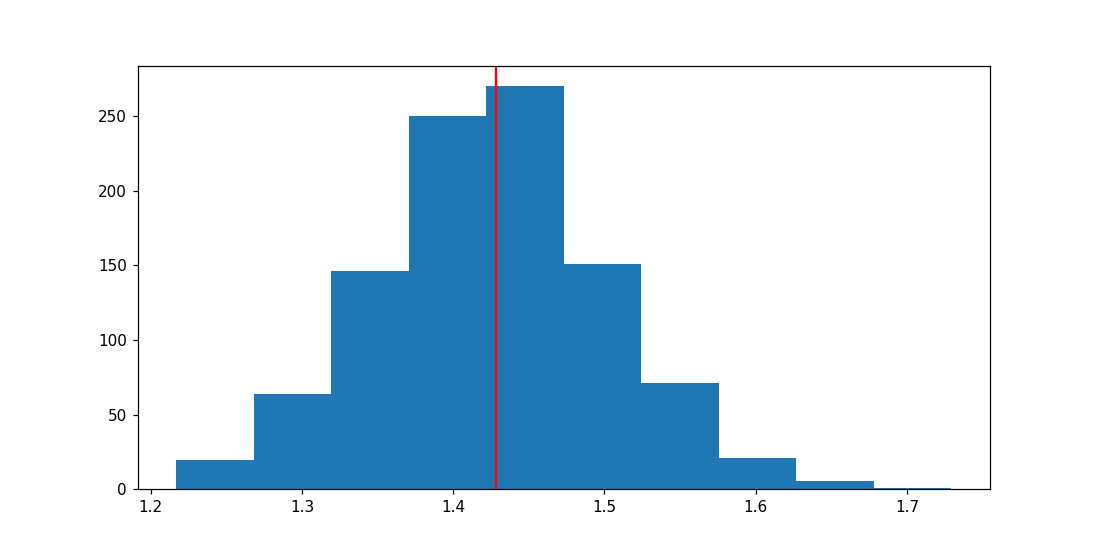

In [46]:
plt.figure(figsize=(10,5))
plt.hist(E)
plt.axvline(1/m, color='red')


In [47]:
print(np.mean(1/E))

0.703801649815304
